<h1> Data Science And Business Analytics Intern @theSparksFoundation</h1>
<h3>Author: Jeevesh Nandan</h3>
<h3><b>Task 6: </b>Prediction using Decision Tree Algorithm</h3>

In [1]:
# Importing libraries in Python
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, average_precision_score
import plotly.graph_objects as go
import plotly.express as px
import graphviz 
%matplotlib inline

# Loading the iris dataset
iris = pd.read_csv("Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [3]:
iris["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


<h3>Set Features and Target Class </h3>

In [5]:
features = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
X = iris[features]
y = iris["Species"]
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<b>In above we set SepalLengthCm, SepalWidthCm, PetalLengthCm and PetalWidthCm from dataset as features class and Species as Target class from dataset.</b>

<h3>Plot Clustering of Dataset Using KMeans Algorithm</h3>

Text(0, 0.5, 'PetalWidthCm')

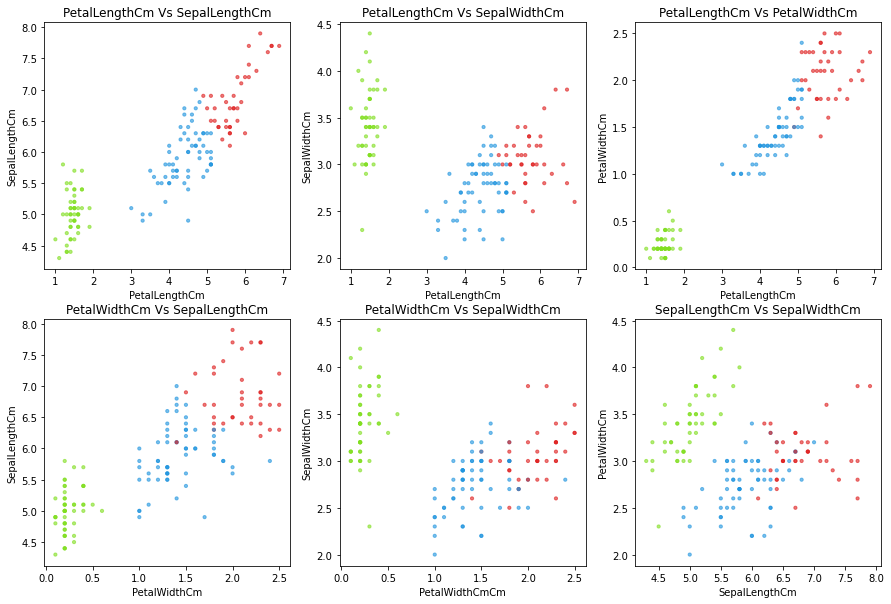

In [6]:
from sklearn.cluster import KMeans
import numpy as np
# k means Algorithm for Clustering centers
kmeans = KMeans(n_clusters=3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
iris['cluster'] = kmeans.fit_predict(iris[features])
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
iris['cen_x'] = iris.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
iris['cen_y'] = iris.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
iris['color'] = iris.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
fig, axis = plt.subplots(2,3)
fig.set_size_inches(15,10)
axis[0,0].scatter(iris.PetalLengthCm, iris.SepalLengthCm, c=iris.color, alpha = 0.6, s=10)
axis[0,0].set_title("PetalLengthCm Vs SepalLengthCm")
axis[0,0].set_xlabel("PetalLengthCm")
axis[0,0].set_ylabel("SepalLengthCm")
axis[0,1].scatter(iris.PetalLengthCm, iris.SepalWidthCm, c=iris.color, alpha = 0.6, s=10)
axis[0,1].set_title("PetalLengthCm Vs SepalWidthCm")
axis[0,1].set_xlabel("PetalLengthCm")
axis[0,1].set_ylabel("SepalWidthCm")
axis[0,2].scatter(iris.PetalLengthCm, iris.PetalWidthCm, c=iris.color, alpha = 0.6, s=10)
axis[0,2].set_title("PetalLengthCm Vs PetalWidthCm")
axis[0,2].set_xlabel("PetalLengthCm")
axis[0,2].set_ylabel("PetalWidthCm")
axis[1,0].scatter(iris.PetalWidthCm, iris.SepalLengthCm, c=iris.color, alpha = 0.6, s=10)
axis[1,0].set_title("PetalWidthCm Vs SepalLengthCm")
axis[1,0].set_xlabel("PetalWidthCm")
axis[1,0].set_ylabel("SepalLengthCm")
axis[1,1].scatter(iris.PetalWidthCm, iris.SepalWidthCm, c=iris.color, alpha = 0.6, s=10)
axis[1,1].set_title("PetalWidthCm Vs SepalWidthCm")
axis[1,1].set_xlabel("PetalWidthCmCm")
axis[1,1].set_ylabel("SepalWidthCm")
axis[1,2].scatter(iris.SepalLengthCm, iris.SepalWidthCm, c=iris.color, alpha = 0.6, s=10)
axis[1,2].set_title("SepalLengthCm Vs SepalWidthCm")
axis[1,2].set_xlabel("SepalLengthCm")
axis[1,2].set_ylabel("PetalWidthCm")

<b>By Plotting 3 cluster using KMeans algorithms for different combinations of features shows us that how (SepalLengthCm Vs PetalLengthCm) and (PetalLengthCm Vs PetalWidthCm) have more distinguiable 3 clusters compare to others. By which we can inference that using those 2 combinations we can more accuratly predict 'Species' of iris.</b>

<h3>Check If Number of Clusters Above is Optimum</h3>

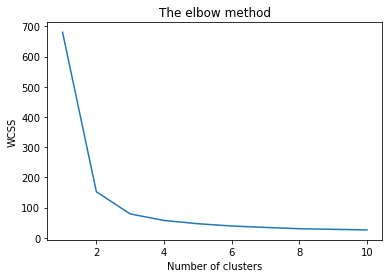

In [7]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(iris[features])
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

<b>This line graph shows us that it like elbow between 2 and 3. WCSS decreases least after 3 clusters. So, by 'The elbow method ' we can say that 3 number of clusters was correct.</b>

<h3>Split Dataset for Algorithm</h3>

In [8]:
#Split dataset between train and test data with 80%-20% respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=False)

<ul><b>
<li>Using train_test_split function to split X and y into (X_train, X_test) and (y_train, y_test) with training having 80% and testing having 20% of dataset.
<li>train_test_split function has attribute random_state if it does not have any value then every time we split dataset new random values are selected.</b>
</ul>

<h3>Train Decision Tree Classifier</h3>

In [9]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

<h3>Predict Test Value from Clssifier</h3>

In [10]:
y_pred = dtc.predict(X_test)
test_pred = pd.DataFrame({"Actual" : y_test, "Predicted" : y_pred})
test_pred.head()

,Actual,Predicted
114,Iris-virginica,Iris-virginica
62,Iris-versicolor,Iris-versicolor
33,Iris-setosa,Iris-setosa
107,Iris-virginica,Iris-virginica
7,Iris-setosa,Iris-setosa


In [11]:
r = export_text(dtc, feature_names=features)
print(r)

|--- PetalLengthCm <= 2.35
|   |--- class: Iris-setosa
|--- PetalLengthCm >  2.35
|   |--- PetalWidthCm <= 1.75
|   |   |--- PetalLengthCm <= 4.95
|   |   |   |--- PetalWidthCm <= 1.65
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- PetalWidthCm >  1.65
|   |   |   |   |--- class: Iris-virginica
|   |   |--- PetalLengthCm >  4.95
|   |   |   |--- PetalWidthCm <= 1.55
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- PetalWidthCm >  1.55
|   |   |   |   |--- SepalLengthCm <= 6.95
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |--- SepalLengthCm >  6.95
|   |   |   |   |   |--- class: Iris-virginica
|   |--- PetalWidthCm >  1.75
|   |   |--- PetalLengthCm <= 4.85
|   |   |   |--- SepalWidthCm <= 3.10
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- SepalWidthCm >  3.10
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- PetalLengthCm >  4.85
|   |   |   |--- class: Iris-virginica



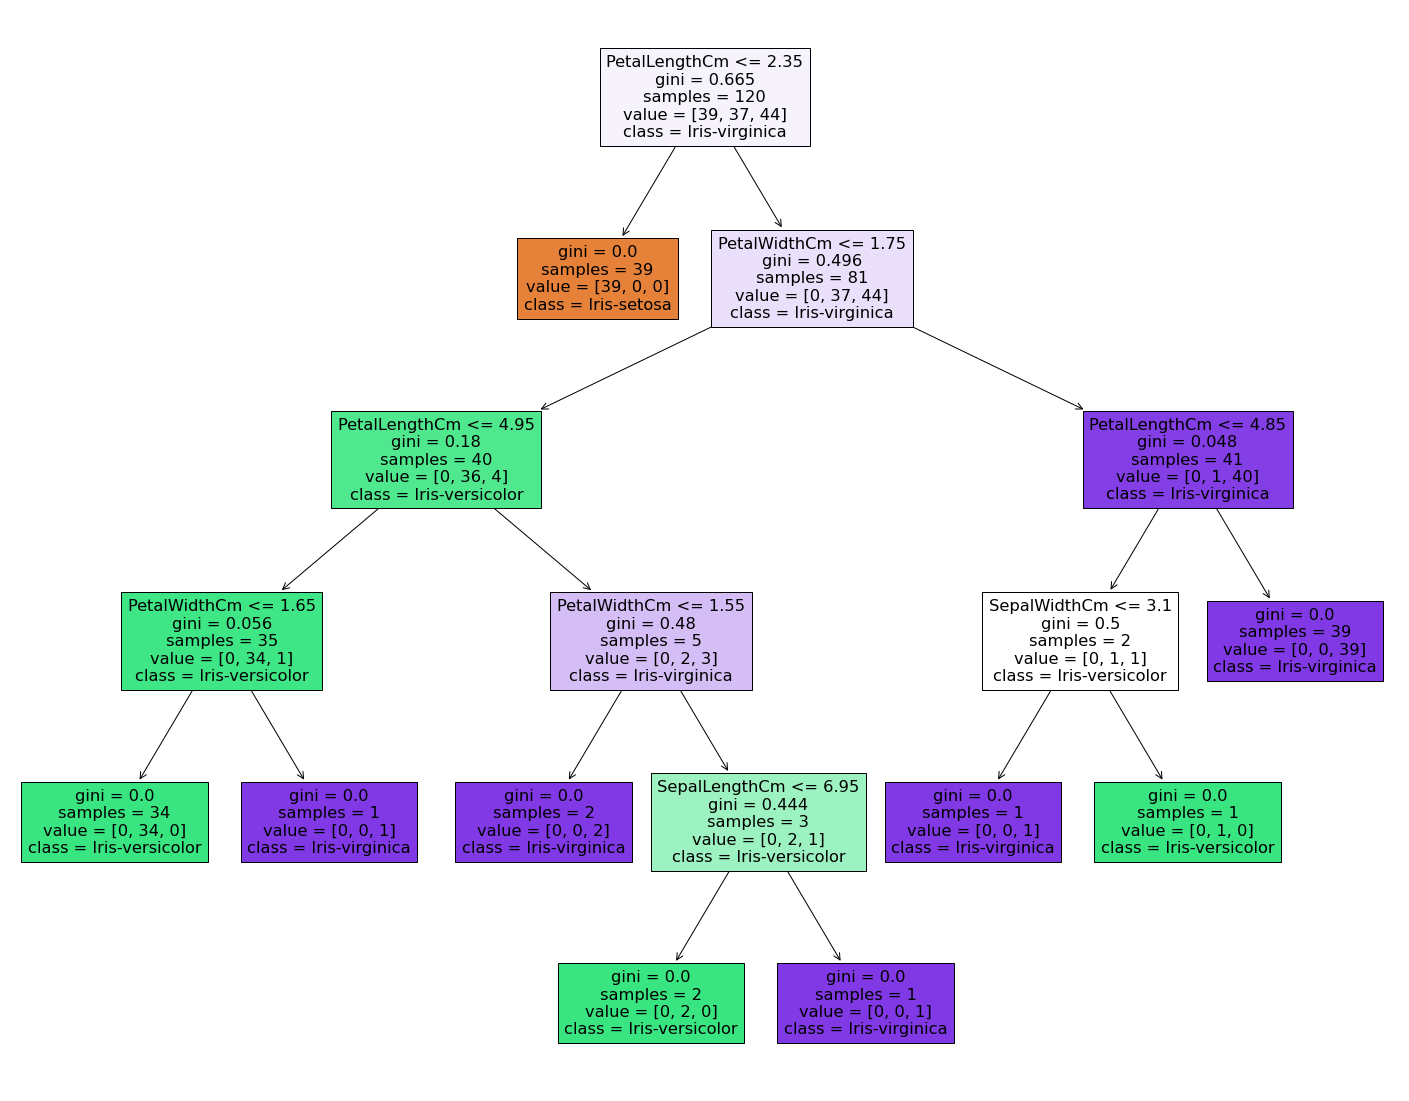

In [12]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(dtc, feature_names=features, class_names=list(iris["Species"].unique()), filled=True)

<h3><u>Question</u> : Provides Features value to Get Target Value</h3>

In [13]:
#predict query solution
sl, sw, pl, pw = float(input("SepalLengthCm : ")), float(input("SepalWidthCm : ")), float(input("PetalLengthCm : ")), float(input("PetalWidthCm : "))
query = [sl,sw,pl,pw]
query_ans = dtc.predict([query])
print(f"Features Value : {query}\nPredicted Species :{query_ans[0]}")

SepalLengthCm : 1.0
SepalWidthCm : 0.3
PetalLengthCm : 9.8
PetalWidthCm : 0.6
Features Value : [1.0, 0.3, 9.8, 0.6]
Predicted Species :Iris-virginica
